In [2]:
import pandas as pd 
df = pd.read_csv("analysis.csv")
df

,Robot,LLM,Pose,Avg1,Avg2,Sum1,Sum2
0,nao,chat,T_pose,0.239288,0.239288,0.478576,0.478576
1,nao,claude,T_pose,0.005062,0.019984,0.010124,0.079937
2,nao,gemini,T_pose,0.239288,0.239288,0.478576,0.478576
3,nao,deepseek,T_pose,0.239288,1.126963,0.478576,6.761776
4,nao,chat,salute,0.488383,0.581691,1.953530,4.653530
...,...,...,...,...,...,...,...
59,khr3hv,deepseek,superhero,1.523333,1.535000,9.140000,12.280000
60,khr3hv,chat,sit,3.370000,2.413333,13.480000,14.480000
61,khr3hv,claude,sit,1.015000,0.860000,4.060000,8.600000
62,khr3hv,gemini,sit,3.370800,2.770800,13.483200,16.624800


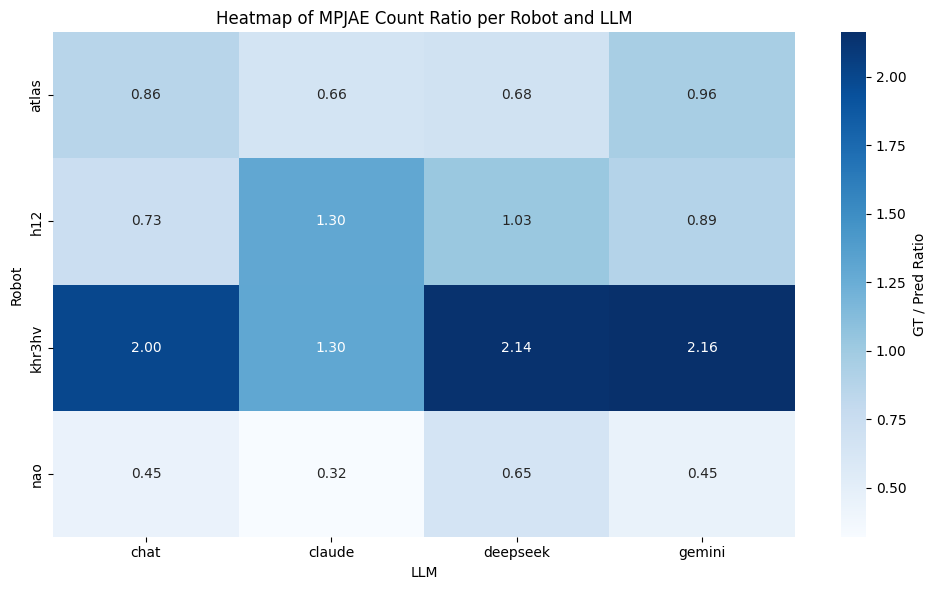

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_data = df.groupby(["Robot","LLM"])["Avg1"].mean()
heatmap_data = heatmap_data.unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", cbar_kws={"label": "GT / Pred Ratio"})
plt.title("Heatmap of MPJAE Count Ratio per Robot and LLM")
plt.ylabel("Robot")
plt.xlabel("LLM")
plt.tight_layout()
plt.show()

In [5]:
df.groupby(["LLM"])["Avg2"].mean() #Best LLM

LLM
chat        0.938408
claude      0.805317
deepseek    1.078145
gemini      1.079885
Name: Avg2, dtype: float64

In [6]:
df.groupby(["Robot","LLM"])["Sum1"].mean()

Robot   LLM     
atlas   chat        4.879160
        claude      3.689160
        deepseek    3.889160
        gemini      5.347910
h12     chat        3.462500
        claude      6.273700
        deepseek    5.011200
        gemini      3.947898
khr3hv  chat        8.015000
        claude      4.977500
        deepseek    8.547900
        gemini      8.626600
nao     chat        3.002371
        claude      2.431041
        deepseek    3.896015
        gemini      2.830853
Name: Sum1, dtype: float64

In [7]:
df.groupby(["Robot","LLM"])["Sum2"].mean()

Robot   LLM     
atlas   chat         5.704160
        claude       6.449560
        deepseek     5.214160
        gemini       5.347910
h12     chat         5.882500
        claude       8.193700
        deepseek     7.759100
        gemini       7.638090
khr3hv  chat         9.325400
        claude       6.587500
        deepseek    14.078700
        gemini      10.982800
nao     chat         5.052371
        claude       3.273494
        deepseek     6.651815
        gemini       3.055853
Name: Sum2, dtype: float64

In [8]:
import pandas as pd 
df = pd.read_csv("analysis_count.csv")
df

,Robot,LLM,Pose,GT_count,Pred_count
0,nao,chat,T_pose,2,2
1,nao,claude,T_pose,2,4
2,nao,gemini,T_pose,2,2
3,nao,deepseek,T_pose,2,6
4,nao,chat,salute,4,8
...,...,...,...,...,...
59,khr3hv,deepseek,superhero,6,4
60,khr3hv,chat,sit,4,6
61,khr3hv,claude,sit,4,8
62,khr3hv,gemini,sit,4,6


In [9]:
ratio = df.groupby(["Robot","LLM"])["GT_count"].mean()/df.groupby(["Robot","LLM"])["Pred_count"].mean()

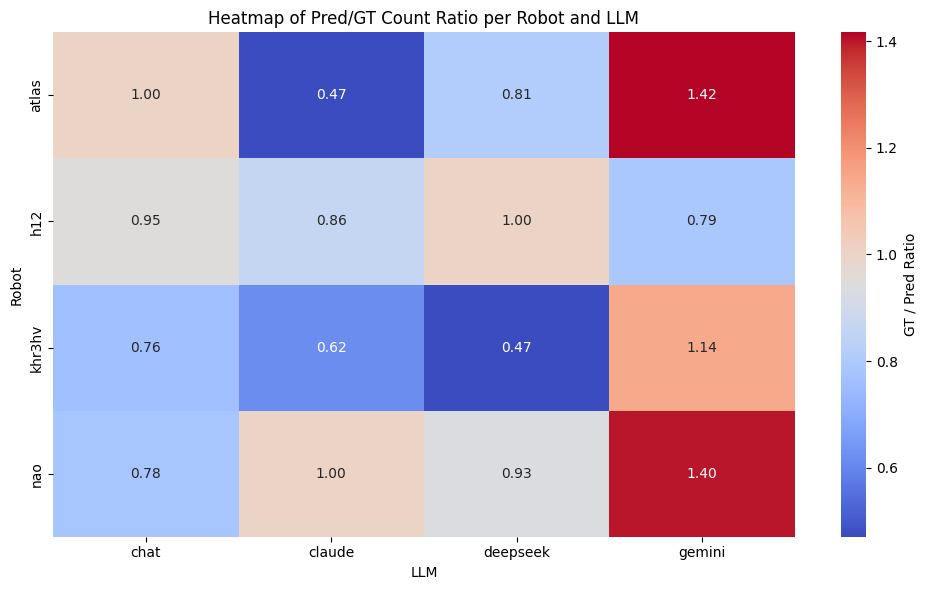

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = ratio.unstack()  # rows=Robot, columns=LLM

# Plot della heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "GT / Pred Ratio"})
plt.title("Heatmap of Pred/GT Count Ratio per Robot and LLM")
plt.ylabel("Robot")
plt.xlabel("LLM")
plt.tight_layout()
plt.show()

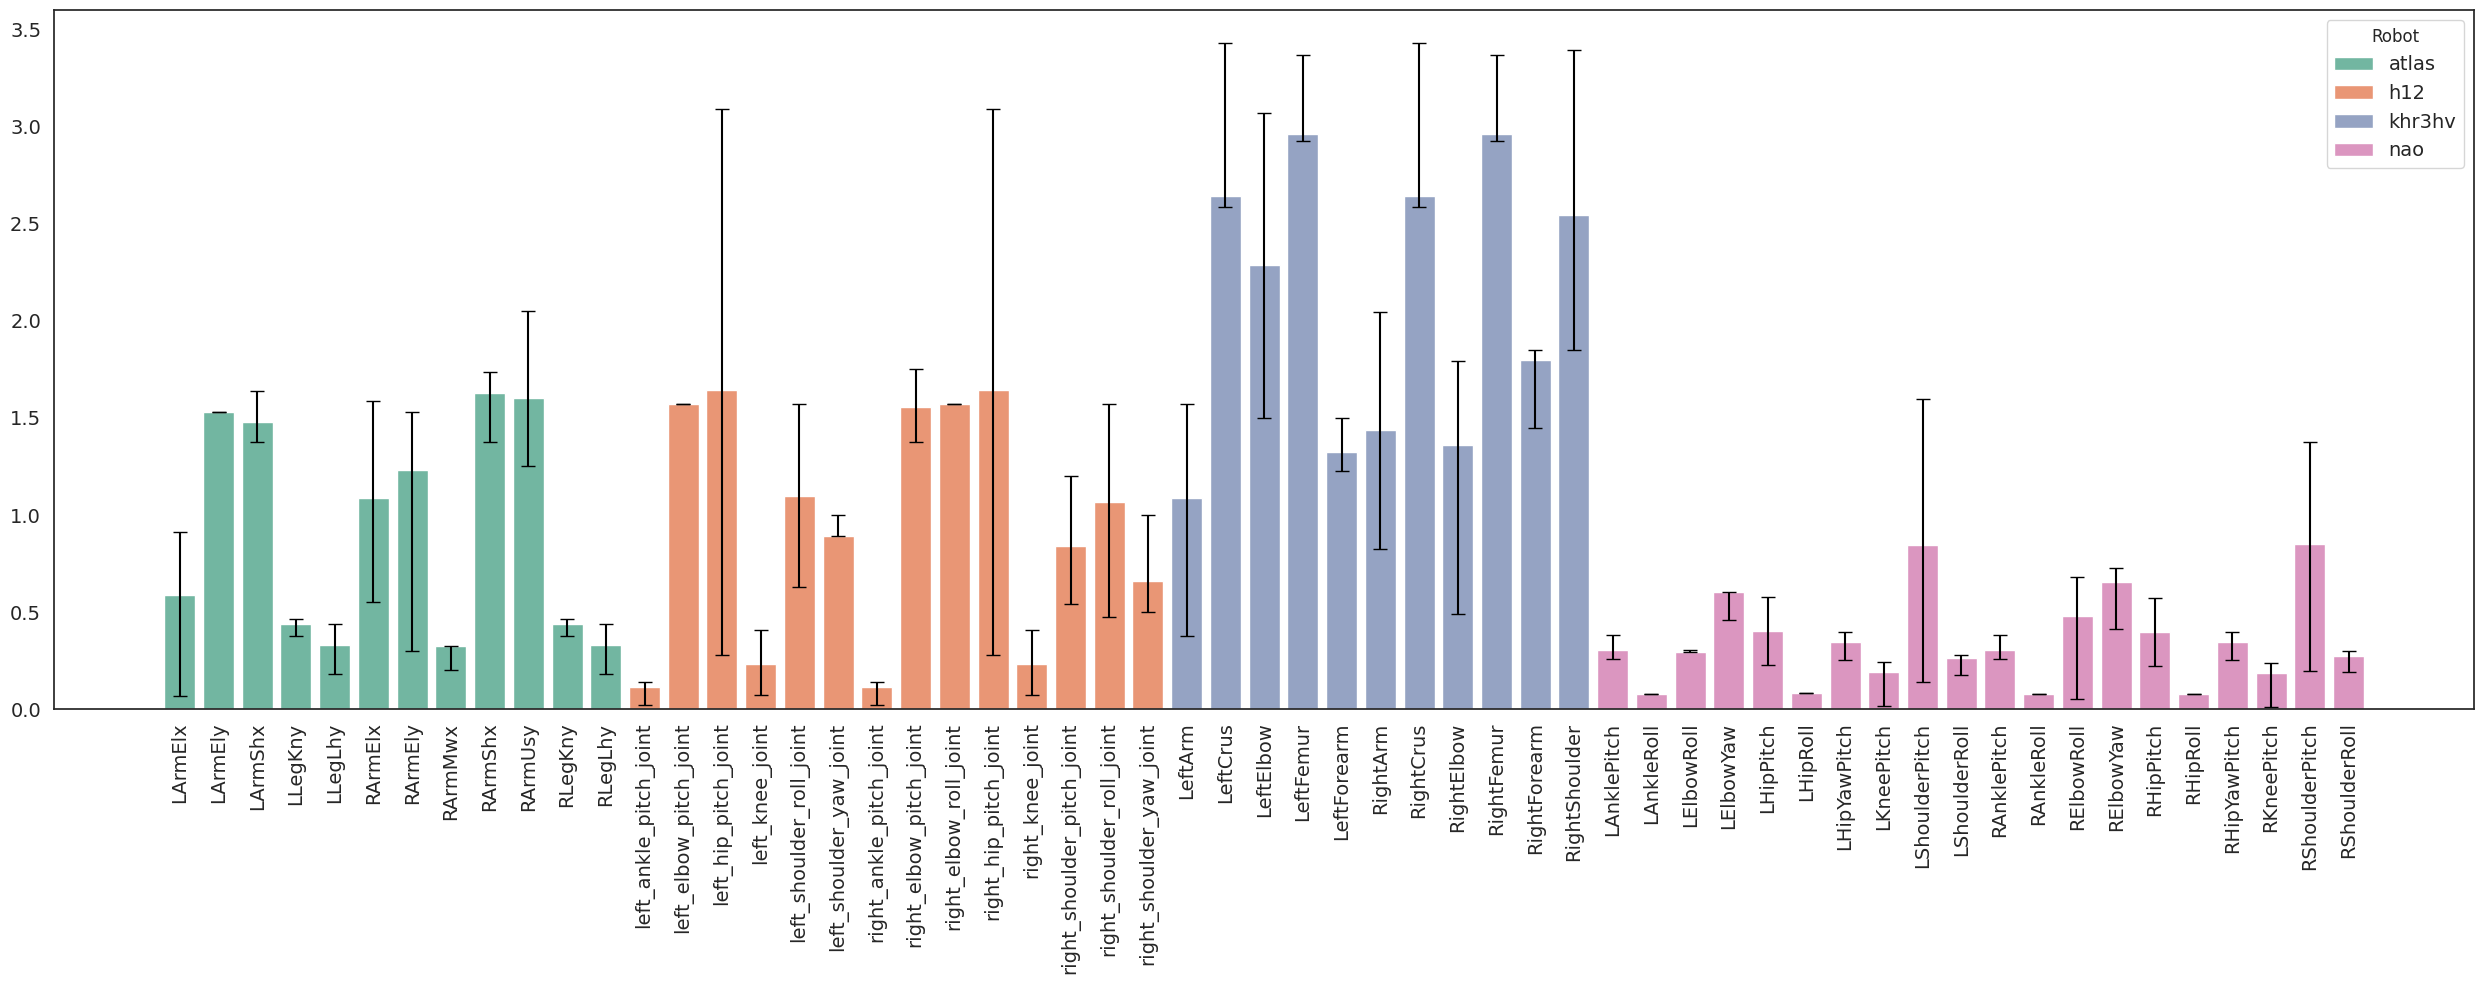

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Carica il CSV
df1 = pd.read_csv("analysis_joints.csv")

grouped = df1.groupby(["Robot", "Joint"])["Error"].agg(
    median="mean",
    q1=lambda x: np.percentile(x, 25),
    q3=lambda x: np.percentile(x, 75)
).reset_index()

robots = grouped["Robot"].unique()

# Trova il valore massimo per y (usiamo il 75° percentile come massimo)
max_y = grouped["q3"].max()

x_coords = range(len(grouped))


sns.set(style="white")

# Grafico a barre con Joints sull'asse X e barre separate per Robot
plt.figure(figsize=(25,10))
sns.barplot(data=grouped, x="Joint", y="median", hue="Robot", palette="Set2")
plt.errorbar(
    x=x_coords,
    y=grouped["median"],
    yerr=[grouped["median"] - grouped["q1"], grouped["q3"] - grouped["median"]],
    fmt='none',  # nessun marker
    ecolor='black',
    capsize=5,
    linewidth=1.5
    )

plt.xlabel(None)
plt.ylabel(None)
#plt.xlabel("Joint Name", fontsize=14)
#plt.ylabel("Mean Absolute Error"))
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Robot",fontsize=14)
plt.tight_layout()
plt.show()# Best LLM by GT count

/tmp/ipykernel_23782/3755385384.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
/tmp/ipykernel_23782/3755385384.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
/tmp/ipykernel_23782/3755385384.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
/tmp/ipykernel_23782/3755385384.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
/tmp/ipykernel_23782/3755385384.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of 

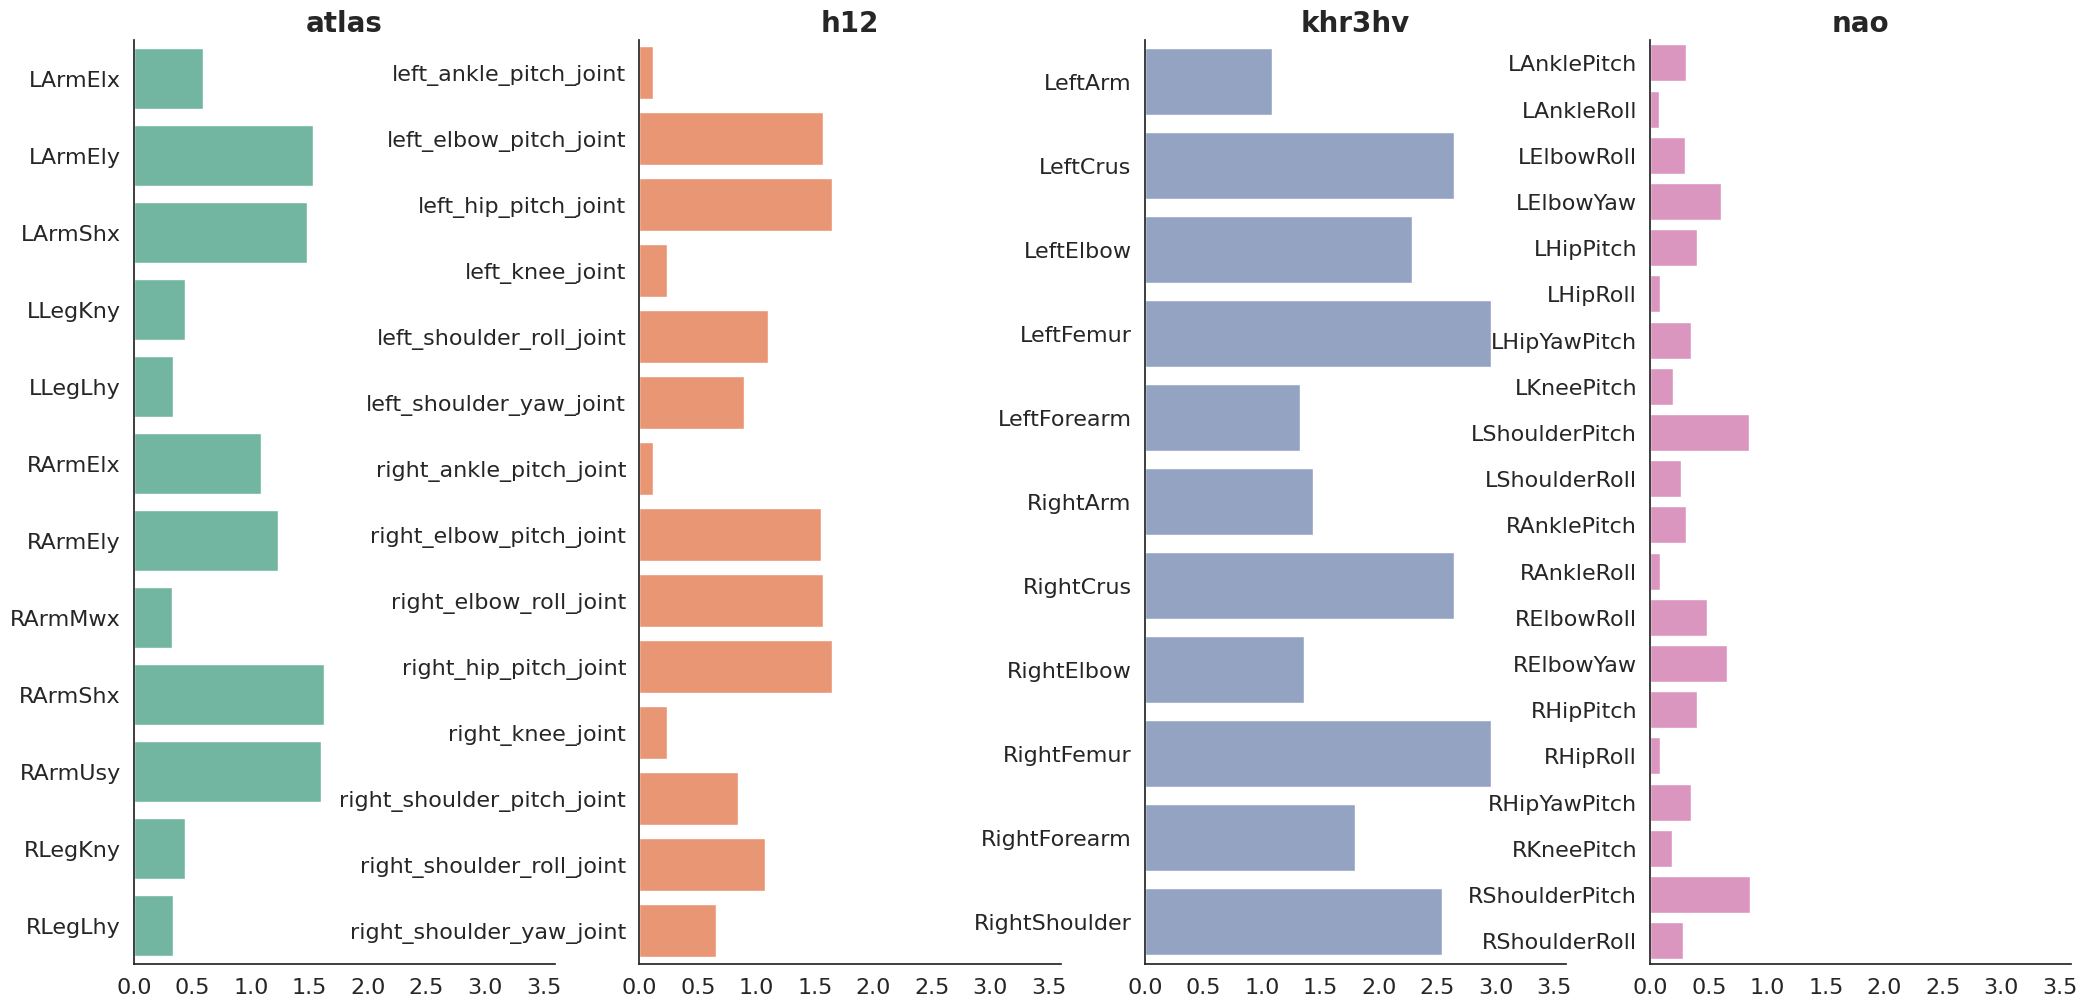

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv("analysis_joints.csv")

grouped = df1.groupby(["Robot", "Joint"])["Error"].agg(
    mean="mean",
    q1=lambda x: np.percentile(x, 25),
    q3=lambda x: np.percentile(x, 75)
).reset_index()

robots = grouped["Robot"].unique()

# Trova il massimo q3 per scala y comune
max_y = grouped["q3"].max()

plt.figure(figsize=(25, 12))
color = sns.color_palette("Set2", n_colors=len(robots))
for i, robot in enumerate(robots, 1):
    ax = plt.subplot(1, 4, i)
    data_robot = grouped[grouped["Robot"] == robot]

    sns.barplot(data=data_robot, y="Joint", x="mean", color=color[i-1])



    ax.set_title(f"{robot}",fontsize=20, fontweight='bold')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xlim(0, max_y * 1.05)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=16)
    sns.despine(ax=ax)

#plt.tight_layout()

plt.savefig("joints_analysis.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [29]:
import pandas as pd

# Carica i dati
df1 = pd.read_csv("analysis_joints.csv")

# Raggruppa e calcola la somma dell'errore per ciascuna combinazione Robot-Giunto
grouped = df1.groupby(["Robot", "Joint"])["Error"].sum().reset_index()

# Calcola l'errore totale per ogni Robot
total_error_per_robot = grouped.groupby("Robot")["Error"].transform("sum")

# Aggiungi una colonna con l'errore percentuale rispetto al totale del robot
grouped["Error_percent"] = (grouped["Error"] / total_error_per_robot) * 100

# Mostra il risultato
print(grouped)

     Robot                       Joint      Error  Error_percent
0    atlas                     LArmElx   2.355400       3.516856
1    atlas                     LArmEly   6.118400       9.135404
2    atlas                     LArmShx  16.285187      24.315468
3    atlas                     LLegKny   1.750000       2.612931
4    atlas                     LLegLhy   1.330000       1.985828
5    atlas                     RArmElx   8.710160      13.005169
6    atlas                     RArmEly   9.859200      14.720805
7    atlas                     RArmMwx   1.300000       1.941034
8    atlas                     RArmShx  11.391252      17.008316
9    atlas                     RArmUsy   4.800000       7.166896
10   atlas                     RLegKny   1.750000       2.612931
11   atlas                     RLegLhy   1.325000       1.978362
12     h12      left_ankle_pitch_joint   0.455800       0.609512
13     h12      left_elbow_pitch_joint   6.280000       8.397833
14     h12        left_hi

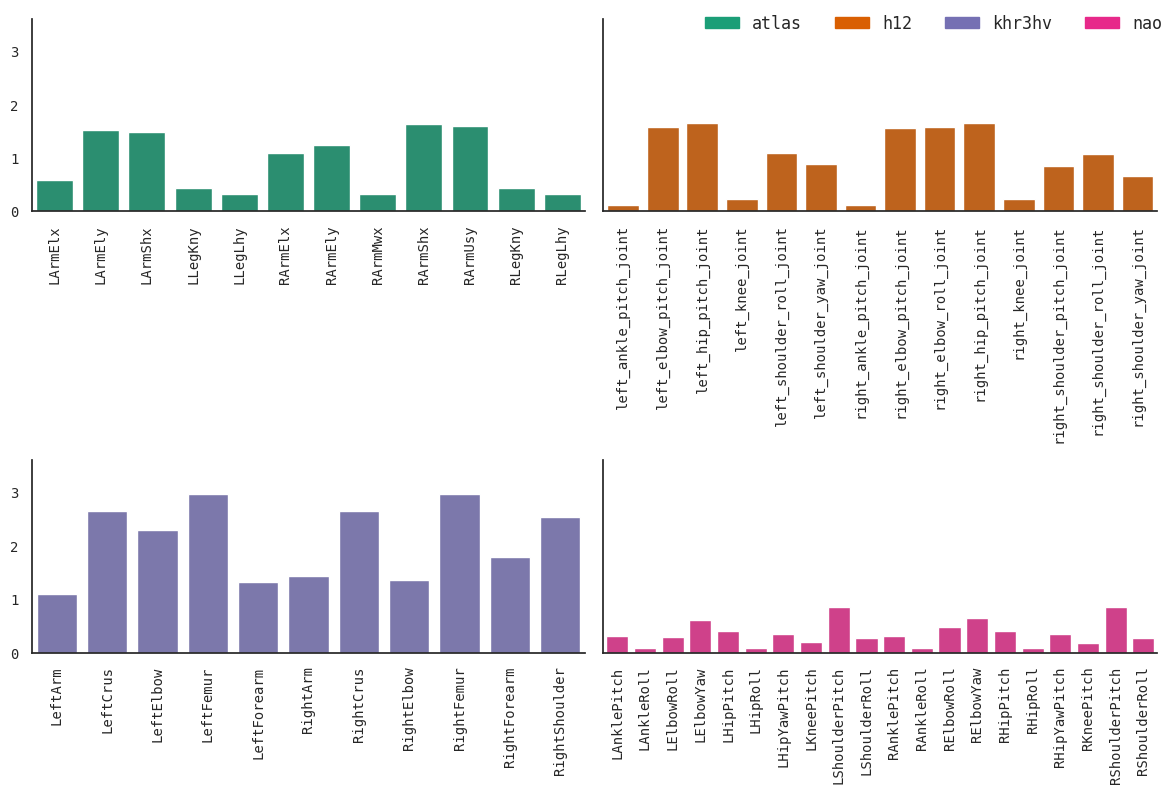

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv("analysis_joints.csv")

sns.set_theme(style="white", font="monospace")

grouped = df1.groupby(["Robot", "Joint"])["Error"].agg(
    mean="mean",
    q1=lambda x: np.percentile(x, 25),
    q3=lambda x: np.percentile(x, 75)
).reset_index()

robots = grouped["Robot"].unique()

# Get the maximum q3 to unify y-axis scale
max_y = grouped["q3"].max()

# Create compact 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
color = sns.color_palette("Dark2", n_colors=len(robots))

for i, (robot, ax) in enumerate(zip(robots, axes.flatten())):
    data_robot = grouped[grouped["Robot"] == robot]
    sns.barplot(data=data_robot, x="Joint", y="mean", color=color[i], ax=ax)

    ax.set_xlabel(None)
    
    ax.set_ylabel(None)
    ax.set_ylim(0, max_y * 1.05)

    # Proper way to format ticks without warnings
    ax.tick_params(axis='x', labelsize=10, rotation=90)
    ax.tick_params(axis='y', labelsize=10)
    

    sns.despine(ax=ax)

# Adjust layout to allow overlapping and compressed layout
#plt.subplots_adjust(hspace=0, wspace=0.2, top=0.9, bottom=0.4)

# Add a shared legend for robot colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color[i]) for i in range(len(robots))]
labels = [str(robot) for robot in robots]
fig.legend(handles, labels, loc='upper right', ncol=len(robots), fontsize=12, title_fontsize=13, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space at bottom for legend
plt.savefig("joints_analysis.pdf", dpi=300, bbox_inches='tight')
plt.show()
